# 10_KMeans_Clustering.ipynb

In [3]:
# --- Imports ---
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score, silhouette_score

In [4]:
# --- Load dataset ---
data = load_iris()
X = pd.DataFrame(data.data, columns=data.feature_names)
y = data.target  # For evaluating clustering

In [5]:
# --- Scale ---
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [6]:
# --- PCA (for visualization + performance) ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [7]:
# --- KMeans ---
kmeans = KMeans(n_clusters=3, random_state=42, n_init='auto')
kmeans.fit(X_pca)

C:\Users\Mehul\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=3, n_init='auto', random_state=42)

In [8]:
y_pred = kmeans.labels_

In [9]:
# --- Evaluation ---
ari = adjusted_rand_score(y, y_pred)
silhouette = silhouette_score(X_pca, y_pred)

print(f"Adjusted Rand Index: {ari:.4f}")
print(f"Silhouette Score: {silhouette:.4f}")

Adjusted Rand Index: 0.6011
Silhouette Score: 0.5113


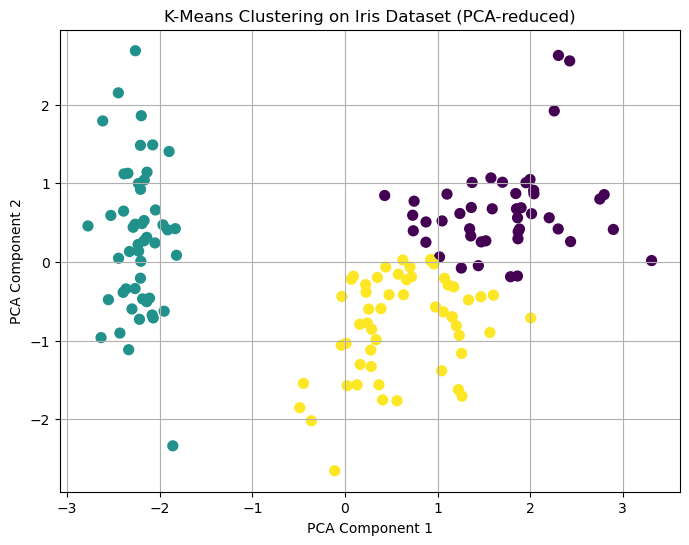

In [10]:
# --- Plot clusters ---
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred, cmap='viridis', s=50)
plt.title("K-Means Clustering on Iris Dataset (PCA-reduced)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()